In [2]:
import pandas as pd                       # Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
price= pd.read_csv('/content/CSUSHPISA (1).csv')    # House Prices
price

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
436,2023-05-01,302.566
437,2023-06-01,304.593
438,2023-07-01,306.767
439,2023-08-01,309.155


In [4]:
unemp_rate=pd.read_csv('/content/U2RATE.csv')    # Unemployement
unemp_rate

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
906,2023-07-01,3.5
907,2023-08-01,3.8
908,2023-09-01,3.8
909,2023-10-01,3.9


In [5]:
#New Houses for Sale by Stage of Construction, Not Started
constr_not_startd= pd.read_csv('/content/NHFSEPNTS.csv')  # thousands of units
constr_not_startd

,DATE,NHSDPNS
0,1963-01-01,9.0
1,1963-02-01,8.0
2,1963-03-01,13.0
3,1963-04-01,10.0
4,1963-05-01,14.0
...,...,...
725,2023-06-01,9.0
726,2023-07-01,8.0
727,2023-08-01,9.0
728,2023-09-01,8.0


In [6]:
#New Houses for Sale by Stage of Construction, Under Construction
undr_constrtn = pd.read_csv('/content/NHFSEPUCS.csv')
undr_constrtn

,DATE,NHFSEPUCS
0,1999-01-01,178.0
1,1999-02-01,180.0
2,1999-03-01,185.0
3,1999-04-01,180.0
4,1999-05-01,184.0
...,...,...
293,2023-06-01,266.0
294,2023-07-01,260.0
295,2023-08-01,258.0
296,2023-09-01,257.0


In [7]:
# New Houses for Sale by Stage of Construction, Completed
cnstr_cmplt= pd.read_csv('/content/NHFSEPCS.csv')
cnstr_cmplt

,DATE,NHFSEPCS
0,1999-01-01,68.0
1,1999-02-01,67.0
2,1999-03-01,68.0
3,1999-04-01,69.0
4,1999-05-01,72.0
...,...,...
293,2023-06-01,70.0
294,2023-07-01,73.0
295,2023-08-01,75.0
296,2023-09-01,75.0


In [8]:
df_under_compl= pd.merge(cnstr_cmplt,undr_constrtn,on='DATE',how='inner')    #joining
df_under_compl

,DATE,NHFSEPCS,NHFSEPUCS
0,1999-01-01,68.0,178.0
1,1999-02-01,67.0,180.0
2,1999-03-01,68.0,185.0
3,1999-04-01,69.0,180.0
4,1999-05-01,72.0,184.0
...,...,...,...
293,2023-06-01,70.0,266.0
294,2023-07-01,73.0,260.0
295,2023-08-01,75.0,258.0
296,2023-09-01,75.0,257.0


In [9]:
df_not_unemp =pd.merge(constr_not_startd,unemp_rate,on='DATE',how='inner')
df_not_unemp

,DATE,NHSDPNS,UNRATE
0,1963-01-01,9.0,5.7
1,1963-02-01,8.0,5.9
2,1963-03-01,13.0,5.7
3,1963-04-01,10.0,5.7
4,1963-05-01,14.0,5.9
...,...,...,...
725,2023-06-01,9.0,3.6
726,2023-07-01,8.0,3.5
727,2023-08-01,9.0,3.8
728,2023-09-01,8.0,3.8


In [10]:
join_df = pd.merge(df_under_compl,df_not_unemp,on='DATE',how='inner')
join_df

,DATE,NHFSEPCS,NHFSEPUCS,NHSDPNS,UNRATE
0,1999-01-01,68.0,178.0,27.0,4.3
1,1999-02-01,67.0,180.0,31.0,4.4
2,1999-03-01,68.0,185.0,31.0,4.2
3,1999-04-01,69.0,180.0,34.0,4.3
4,1999-05-01,72.0,184.0,29.0,4.2
...,...,...,...,...,...
293,2023-06-01,70.0,266.0,9.0,3.6
294,2023-07-01,73.0,260.0,8.0,3.5
295,2023-08-01,75.0,258.0,9.0,3.8
296,2023-09-01,75.0,257.0,8.0,3.8


In [11]:
join_data_df = pd.merge(join_df,price,on='DATE',how='inner')

In [22]:
#renaming column name for better understing the data & aligning Data to center(for better view data)
join_data_df.rename(columns = {'NHFSEPCS':'Const_complt', 'NHFSEPUCS':'un_constr','NHSDPNS':'Cnstr_not_Strtd','UNRATE':'Unemploy_Rate','CSUSHPISA':'Price_fact'}, inplace = True)
join_data_df

,DATE,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact,year
0,1999-01-01,68.0,178.0,27.0,4.3,93.208,1999
1,1999-02-01,67.0,180.0,31.0,4.4,93.672,1999
2,1999-03-01,68.0,185.0,31.0,4.2,94.218,1999
3,1999-04-01,69.0,180.0,34.0,4.3,94.785,1999
4,1999-05-01,72.0,184.0,29.0,4.2,95.344,1999
...,...,...,...,...,...,...,...
292,2023-05-01,66.0,268.0,10.0,3.7,302.566,2023
293,2023-06-01,70.0,266.0,9.0,3.6,304.593,2023
294,2023-07-01,73.0,260.0,8.0,3.5,306.767,2023
295,2023-08-01,75.0,258.0,9.0,3.8,309.155,2023


In [23]:
join_data_df.describe()   #calculating some statistical data like percentile, mean and std of the numerical v

,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact,year
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,81.821549,185.026936,18.619529,5.722896,172.809909,2010.878788
std,39.870718,67.989710,11.026382,1.953327,51.128604,7.157409
min,31.000000,70.000000,4.000000,3.400000,93.208000,1999.000000
25%,56.000000,124.000000,10.000000,4.300000,140.179000,2005.000000
50%,75.000000,185.000000,15.000000,5.100000,165.215000,2011.000000
75%,87.000000,232.000000,26.000000,6.500000,191.452000,2017.000000
max,194.000000,338.000000,53.000000,14.700000,311.175000,2023.000000


In [24]:
join_data_df.info()  # prints information about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             297 non-null    object 
 1   Const_complt     297 non-null    float64
 2   un_constr        297 non-null    float64
 3   Cnstr_not_Strtd  297 non-null    float64
 4   Unemploy_Rate    297 non-null    float64
 5   Price_fact       297 non-null    float64
 6   year             297 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.6+ KB


In [25]:
join_data_df.duplicated().sum()   # in the DataFrame are duplicated and not

0

In [26]:
join_data_df.isnull().sum()    #Cheecking there null value in DataSet

DATE               0
Const_complt       0
un_constr          0
Cnstr_not_Strtd    0
Unemploy_Rate      0
Price_fact         0
year               0
dtype: int64

In [27]:
join_data_df.nunique()         #checking the number of unique values for each column.

DATE               297
Const_complt       109
un_constr          163
Cnstr_not_Strtd     46
Unemploy_Rate       64
Price_fact         297
year                25
dtype: int64

**Exploratory data analysis (EDA)**

In [28]:
join_data_df['year'] = pd.DatetimeIndex(join_data_df['DATE']).year     # Creating New columm with Year name

In [29]:
join_data_df

,DATE,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact,year
0,1999-01-01,68.0,178.0,27.0,4.3,93.208,1999
1,1999-02-01,67.0,180.0,31.0,4.4,93.672,1999
2,1999-03-01,68.0,185.0,31.0,4.2,94.218,1999
3,1999-04-01,69.0,180.0,34.0,4.3,94.785,1999
4,1999-05-01,72.0,184.0,29.0,4.2,95.344,1999
...,...,...,...,...,...,...,...
292,2023-05-01,66.0,268.0,10.0,3.7,302.566,2023
293,2023-06-01,70.0,266.0,9.0,3.6,304.593,2023
294,2023-07-01,73.0,260.0,8.0,3.5,306.767,2023
295,2023-08-01,75.0,258.0,9.0,3.8,309.155,2023


In [30]:
join_df_mean = join_data_df.groupby(by='year', as_index=False).mean()  # Mean of the Data and group By year
join_df_mean

,year,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact
0,1999,71.500000,183.000000,26.500000,4.216667,96.366500
1,2000,84.250000,180.250000,26.583333,3.966667,104.768750
2,2001,77.583333,182.333333,27.666667,4.741667,113.179917
3,2002,82.500000,199.000000,29.750000,5.783333,122.279250
4,2003,80.833333,213.916667,34.500000,5.991667,133.731333
5,2004,89.916667,243.250000,40.166667,5.541667,150.440250
6,2005,106.750000,279.500000,41.833333,5.083333,171.737000
7,2006,144.083333,318.166667,28.833333,4.608333,183.447500
8,2007,185.416667,267.166667,16.250000,4.616667,179.918917
9,2008,179.083333,190.416667,8.500000,5.800000,164.057417


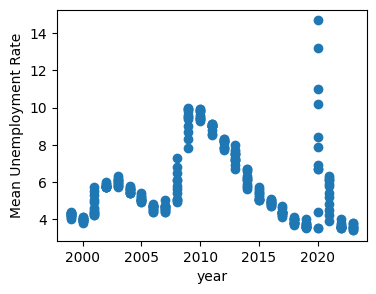

In [31]:
plt.figure(figsize=(4,3))
plt.scatter(join_data_df.year,join_data_df.Unemploy_Rate)
plt.xlabel('year')
plt.ylabel('Mean Unemployment Rate')
plt.show()

the first peak in unemployment rate came in the year 2021 and started to decrease slowly from 2022 to 2023 became lowest in the year 2023

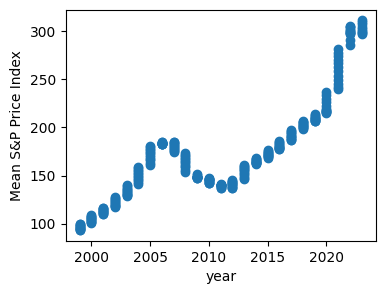

In [32]:
plt.figure(figsize=(4,3))
plt.scatter(join_data_df.year,join_data_df.Price_fact)
plt.xlabel('year')
plt.ylabel('Mean S&P Price Index')
plt.show()

The price of house kept on increasing from year 2003 to 2005 and started gradually decreasing from 2007 to 2012 ( in the same year the unemployment rate started increasing ), after 2020 there was large difference in the price of house.

In [33]:
df_max=join_data_df.groupby(by='year', as_index=False).max()   # max values of each factors on the yearly basis
df_max

,year,DATE,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact
0,1999,1999-12-01,77.0,191.0,34.0,4.4,99.845
1,2000,2000-12-01,90.0,188.0,34.0,4.1,109.140
2,2001,2001-12-01,82.0,191.0,37.0,5.7,116.455
3,2002,2002-12-01,86.0,204.0,35.0,6.0,127.624
4,2003,2003-12-01,86.0,232.0,42.0,6.3,140.179
5,2004,2004-12-01,97.0,257.0,53.0,5.8,159.330
6,2005,2005-12-01,110.0,306.0,51.0,5.4,180.910
7,2006,2006-12-01,166.0,338.0,41.0,4.8,184.364
8,2007,2007-12-01,194.0,285.0,23.0,5.0,184.598
9,2008,2008-12-01,191.0,227.0,13.0,7.3,173.132


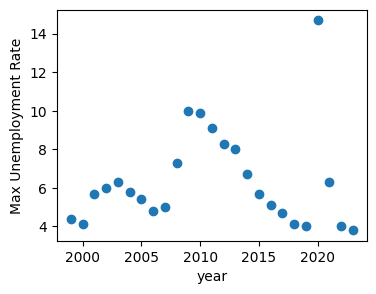

In [34]:
plt.figure(figsize=(4,3))
plt.scatter(df_max.year,df_max.Unemploy_Rate)
plt.xlabel('year')
plt.ylabel('Max Unemployment Rate')
plt.show()

Maximum Unemploylent Rate was seen in the year 2021

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(join_data_df.year,join_data_df.Price_fact)
plt.xlabel('year')
plt.ylabel('Max S&P Price Index')
plt.show()

In [35]:
df_min=join_data_df.groupby(by='year', as_index=False).min()  # min values of each factors on the yearly basis
df_min

,year,DATE,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact
0,1999,1999-01-01,67.0,175.0,19.0,4.0,93.208
1,2000,2000-01-01,79.0,170.0,23.0,3.8,100.551
2,2001,2001-01-01,75.0,170.0,20.0,4.2,109.846
3,2002,2002-01-01,77.0,190.0,25.0,5.7,117.144
4,2003,2003-01-01,77.0,202.0,28.0,5.7,128.461
5,2004,2004-01-01,82.0,231.0,33.0,5.4,141.646
6,2005,2005-01-01,102.0,264.0,32.0,4.9,161.288
7,2006,2006-01-01,113.0,290.0,19.0,4.4,182.321
8,2007,2007-01-01,169.0,234.0,9.0,4.4,174.342
9,2008,2008-01-01,166.0,145.0,4.0,4.9,153.619


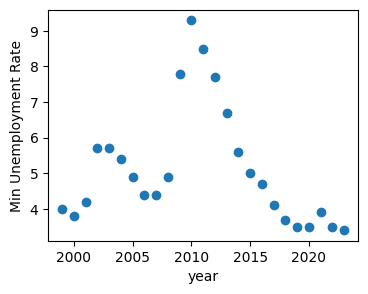

In [36]:
plt.figure(figsize=(4,3))
plt.scatter(df_min.year,df_min.Unemploy_Rate)
plt.xlabel('year')
plt.ylabel('Min Unemployment Rate')
plt.show()

Minimum Unemployment Rate was seen in the year 2019

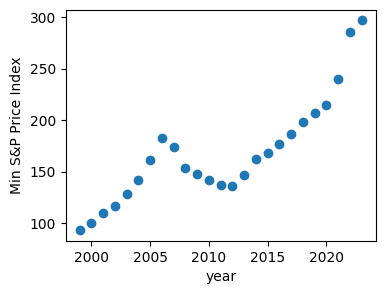

In [37]:
plt.figure(figsize=(4,3))
plt.scatter(df_min.year,df_min.Price_fact)
plt.xlabel('year')
plt.ylabel('Min S&P Price Index')
plt.show()

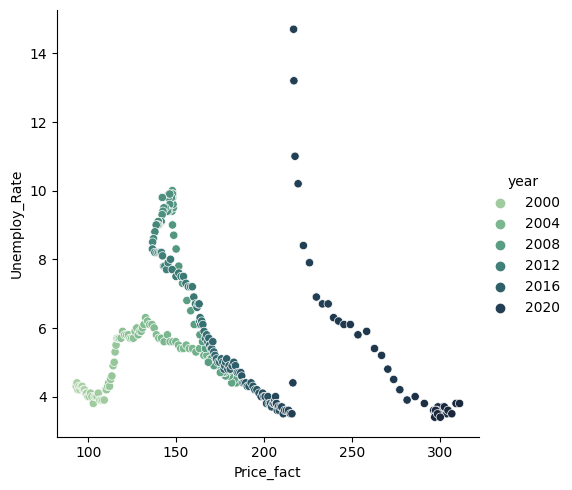

In [38]:
sns.relplot(x="Price_fact", y="Unemploy_Rate", hue="year", palette="ch:r=-.5,l=.75", data=join_data_df);

In [44]:
data_new=pd.read_csv('/content/HNFSEPUSSA.csv')  # Total number of houses for sale
data_new.head(12)

,DATE,HNFSEPUSSA
0,1963-01-01,235.0
1,1963-02-01,238.0
2,1963-03-01,242.0
3,1963-04-01,246.0
4,1963-05-01,248.0
5,1963-06-01,253.0
6,1963-07-01,254.0
7,1963-08-01,264.0
8,1963-09-01,257.0
9,1963-10-01,274.0


In [45]:
data_new.describe()

,HNFSEPUSSA
count,730.000000
mean,314.390411
std,85.594554
min,142.000000
25%,254.000000
50%,312.500000
75%,362.000000
max,572.000000


In [46]:
data_new['year']=  pd.DatetimeIndex(data_new['DATE']).year

In [47]:
data_new1=data_new.groupby(by='year',as_index=False).mean()
data_new1

,year,HNFSEPUSSA
0,1963,252.750000
1,1964,258.750000
2,1965,236.583333
3,1966,211.666667
4,1967,187.583333
...,...,...
56,2019,330.333333
57,2020,303.833333
58,2021,349.166667
59,2022,439.833333


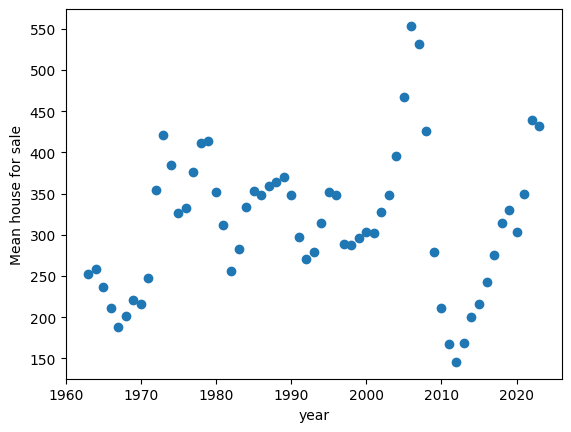

In [49]:
plt.scatter(data_new1.year,data_new1.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Mean house for sale')
plt.show()

Maximum number of houses were available in 2007 and least in 2012

In [50]:
data_max=data_new1.groupby(by='year',as_index=False).max()
data_max

,year,HNFSEPUSSA
0,1963,252.750000
1,1964,258.750000
2,1965,236.583333
3,1966,211.666667
4,1967,187.583333
...,...,...
56,2019,330.333333
57,2020,303.833333
58,2021,349.166667
59,2022,439.833333


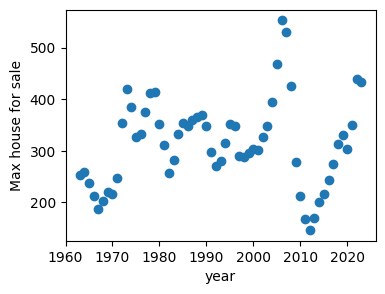

In [51]:
plt.figure(figsize=(4,3))
plt.scatter(data_max.year,data_max.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Max house for sale')
plt.show()

In [56]:
data_min=data_new1.groupby(by='year',as_index=False).min()
data_min

,year,HNFSEPUSSA
0,1963,252.750000
1,1964,258.750000
2,1965,236.583333
3,1966,211.666667
4,1967,187.583333
...,...,...
56,2019,330.333333
57,2020,303.833333
58,2021,349.166667
59,2022,439.833333


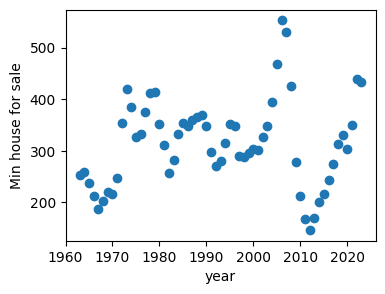

In [57]:
plt.figure(figsize=(4,3))
plt.scatter(data_min.year,data_min.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Min house for sale')
plt.show()

In [58]:
join_data_df.corr()

,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact,year
Const_complt,1.000000,0.364605,0.096456,-0.038216,-0.186837,-0.436374
un_constr,0.364605,1.000000,0.498897,-0.627771,0.460414,-0.041051
Cnstr_not_Strtd,0.096456,0.498897,1.000000,-0.316145,-0.288837,-0.559438
Unemploy_Rate,-0.038216,-0.627771,-0.316145,1.000000,-0.291095,-0.035927
Price_fact,-0.186837,0.460414,-0.288837,-0.291095,1.000000,0.846680
year,-0.436374,-0.041051,-0.559438,-0.035927,0.846680,1.000000


In [59]:
data_df_new=pd.merge(data_new,join_data_df,on='DATE',how ='inner')

In [60]:
data_df_new

,DATE,HNFSEPUSSA,year_x,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact,year_y
0,1999-01-01,284.0,1999,68.0,178.0,27.0,4.3,93.208,1999
1,1999-02-01,285.0,1999,67.0,180.0,31.0,4.4,93.672,1999
2,1999-03-01,289.0,1999,68.0,185.0,31.0,4.2,94.218,1999
3,1999-04-01,290.0,1999,69.0,180.0,34.0,4.3,94.785,1999
4,1999-05-01,295.0,1999,72.0,184.0,29.0,4.2,95.344,1999
...,...,...,...,...,...,...,...,...,...
292,2023-05-01,426.0,2023,66.0,268.0,10.0,3.7,302.566,2023
293,2023-06-01,429.0,2023,70.0,266.0,9.0,3.6,304.593,2023
294,2023-07-01,429.0,2023,73.0,260.0,8.0,3.5,306.767,2023
295,2023-08-01,430.0,2023,75.0,258.0,9.0,3.8,309.155,2023


In [61]:
data_df_new=data_df_new.drop(columns=['year_x','year_y','Const_complt','un_constr','Cnstr_not_Strtd'],axis=1)
data_df_new

,DATE,HNFSEPUSSA,Unemploy_Rate,Price_fact
0,1999-01-01,284.0,4.3,93.208
1,1999-02-01,285.0,4.4,93.672
2,1999-03-01,289.0,4.2,94.218
3,1999-04-01,290.0,4.3,94.785
4,1999-05-01,295.0,4.2,95.344
...,...,...,...,...
292,2023-05-01,426.0,3.7,302.566
293,2023-06-01,429.0,3.6,304.593
294,2023-07-01,429.0,3.5,306.767
295,2023-08-01,430.0,3.8,309.155


In [62]:
data_df_new.rename(columns={'HNFSEPUSSA':'ttl_homes_avlbl_for_sale'},inplace=True)
data_df_new

,DATE,ttl_homes_avlbl_for_sale,Unemploy_Rate,Price_fact
0,1999-01-01,284.0,4.3,93.208
1,1999-02-01,285.0,4.4,93.672
2,1999-03-01,289.0,4.2,94.218
3,1999-04-01,290.0,4.3,94.785
4,1999-05-01,295.0,4.2,95.344
...,...,...,...,...
292,2023-05-01,426.0,3.7,302.566
293,2023-06-01,429.0,3.6,304.593
294,2023-07-01,429.0,3.5,306.767
295,2023-08-01,430.0,3.8,309.155


In [63]:
data_df_new.drop(columns=['DATE'],axis=1,inplace=True)

In [64]:
data_df_new

,ttl_homes_avlbl_for_sale,Unemploy_Rate,Price_fact
0,284.0,4.3,93.208
1,285.0,4.4,93.672
2,289.0,4.2,94.218
3,290.0,4.3,94.785
4,295.0,4.2,95.344
...,...,...,...
292,426.0,3.7,302.566
293,429.0,3.6,304.593
294,429.0,3.5,306.767
295,430.0,3.8,309.155


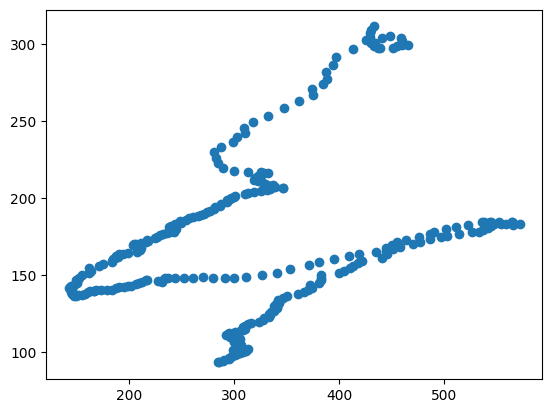

In [65]:
plt.scatter(data_df_new.ttl_homes_avlbl_for_sale,data_df_new.Price_fact)

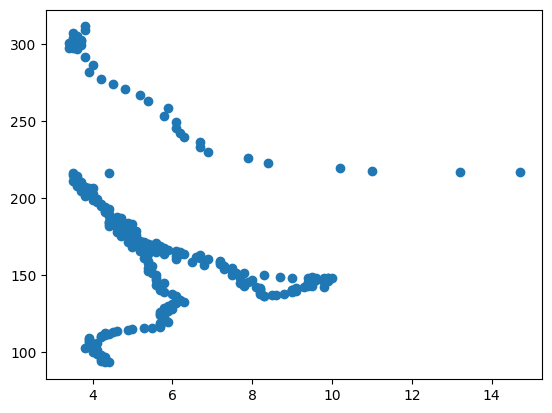

In [66]:
plt.scatter(data_df_new.Unemploy_Rate,data_df_new.Price_fact)

**Building Data Science Model**

In [70]:
X=data_df_new.drop(columns=['Price_fact'],axis=1)
Y=data_df_new['Price_fact']

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lin_reg =LinearRegression()

In [81]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [82]:
Y_predict =lin_reg.predict(x_test)
Y_predict

array([177.4697481 , 206.02920702, 140.79048725, 162.64948437,
       141.02895664, 145.43404058, 198.16378709, 152.69940055,
       194.04047393, 141.01847044, 176.31934597, 145.76281596,
       174.34867368, 173.54024633, 173.32139274, 175.97737119,
       180.28672274, 175.7389018 , 174.83745526, 183.43925575,
       205.37671606, 177.36624271, 176.05990419, 154.96603302,
       167.48956229, 140.68698186, 158.15915423, 167.12661511,
       202.61994543, 142.99827232, 183.24273117, 175.06543844,
       195.32584006, 178.82580442, 178.86910582, 193.03552199,
       157.61929826, 183.45751495, 143.58648948, 168.27701724,
       196.08047981, 177.12777332, 141.17305023, 176.89979014,
       175.91309739, 174.71297746, 190.27875135, 143.93117747,
       194.38244871, 200.89958533, 140.30306228, 182.99241898,
       173.11709516, 203.77034756, 136.85691567, 165.06428023,
       178.75511423, 173.65423792, 160.23468851, 196.2272866 ])

In [83]:
from sklearn.metrics import r2_score

In [84]:
score=[]
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    yprd=lr.predict(x_test)
    score.append(r2_score(y_test,yprd))

In [85]:
import numpy as np
np.argmax(score)

98

In [86]:
score[np.argmax(score)]

0.231744351071283

Since the realtion between dependent and independent variable is not linear LR model is not giving good result Therefor we are using Random forest regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100,max_depth=9,random_state = 0)
regressor1.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, random_state=0)

In [88]:
Y_pred = regressor1.predict(x_test)

r2_score(y_test,Y_pred)

0.639593487694935

In [90]:
scoree=[]
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(x_train, y_train)
    yprd=regressor.predict(x_test)
    scoree.append(r2_score(y_test,yprd))

In [91]:
np.argmax(scoree)

636

In [92]:
scoree[np.argmax(scoree)]

0.9748311147184073

In [93]:
!pip install -U notebook-as-pdf
!pyppeteer-install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
[INFO] Starting Chromium download.
100% 109M/109M [00:01<00:00, 92.1Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/588429
